<a href="https://colab.research.google.com/github/Namaswi24/Stock-Analysis/blob/main/Stock_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance pandas numpy matplotlib seaborn scipy


[*********************100%***********************]  1 of 1 completed

Analyzing AAPL stock data...

Basic Descriptive Statistics for AAPL:
Mean: 152.94, Variance: 161.95, Std Dev: 12.73
Skewness: 0.01, Kurtosis: -1.01
Coefficient of Variance: 8.32


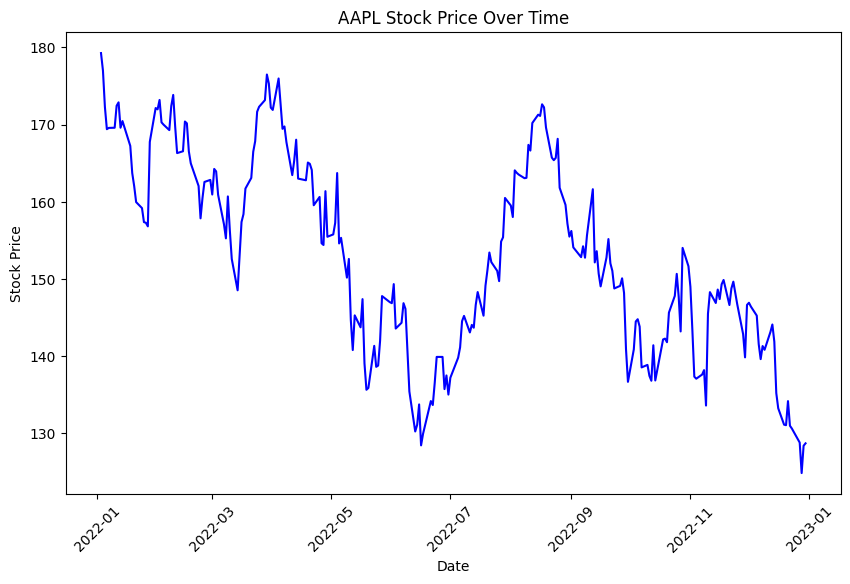

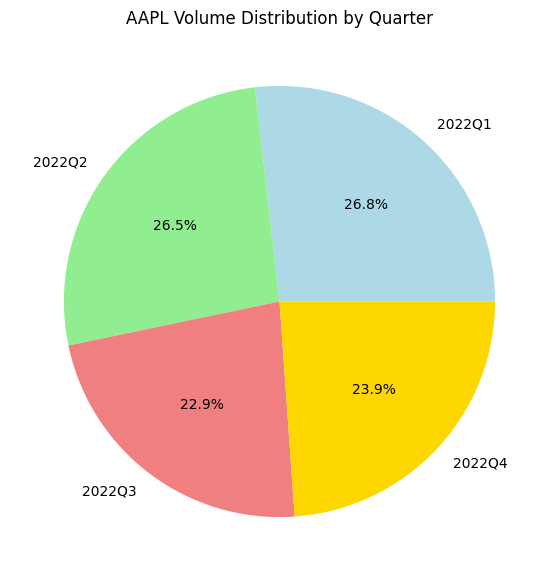

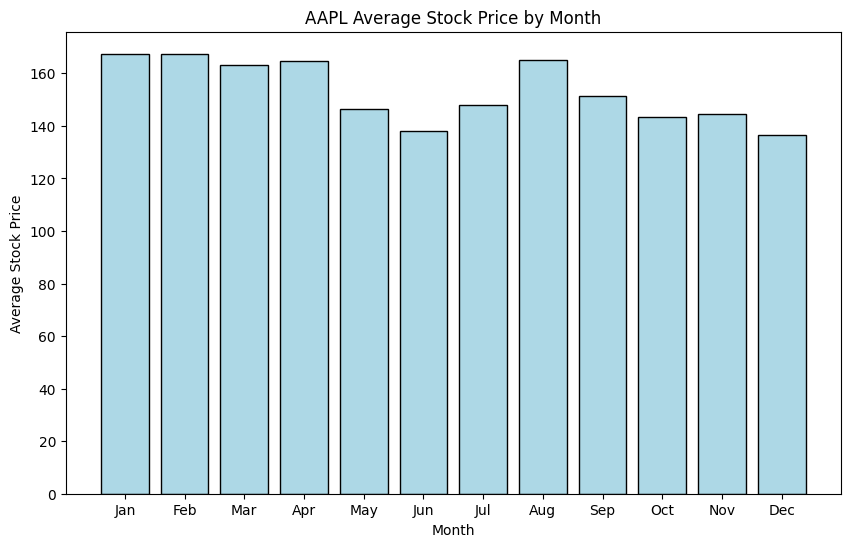

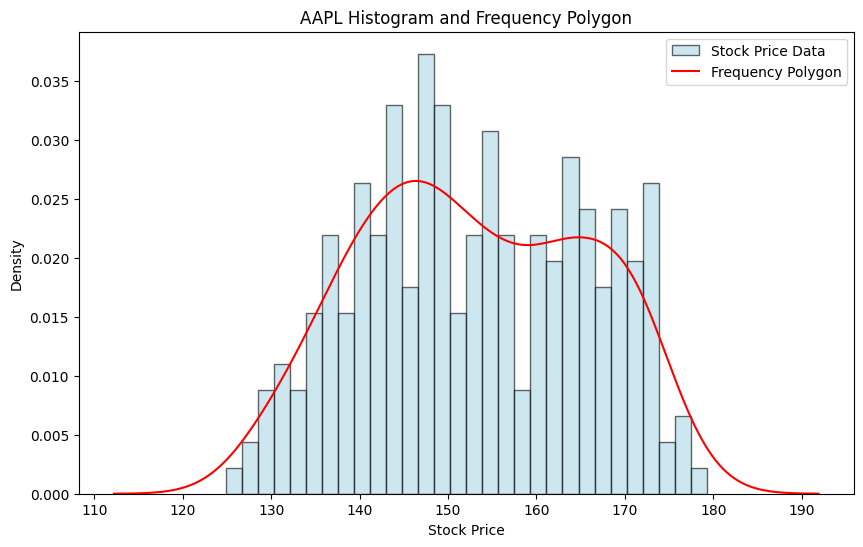

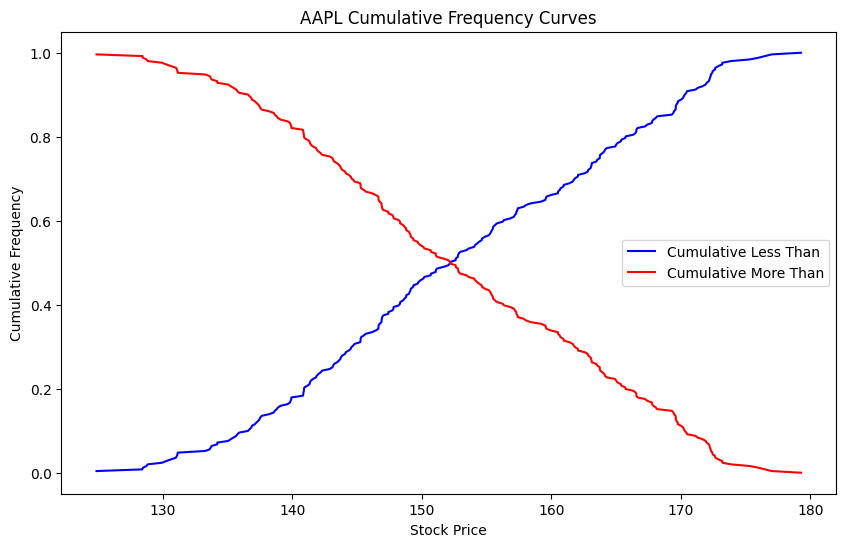

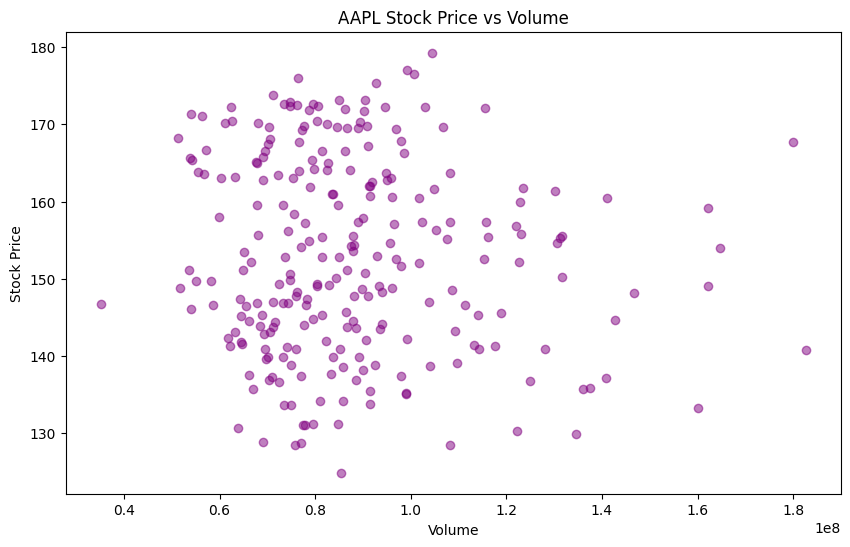

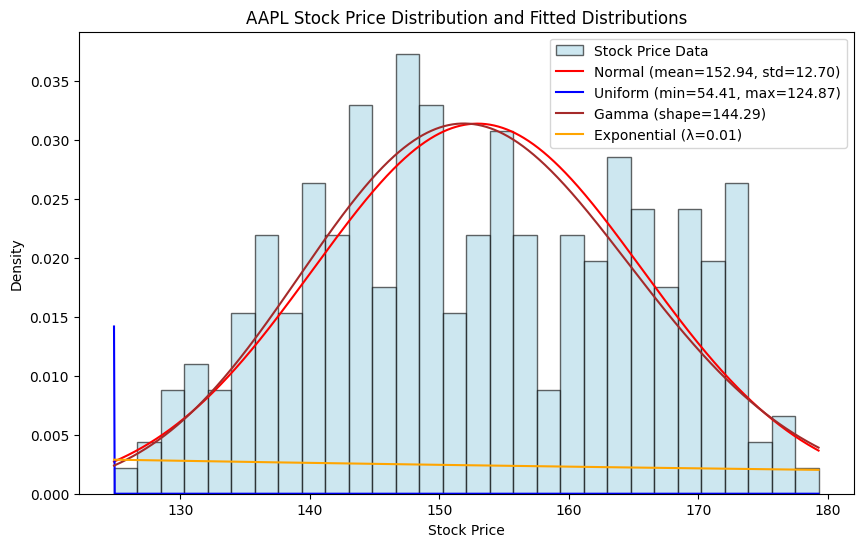

[*********************100%***********************]  1 of 1 completed


Empirical Moments:
Mean: 152.94, Variance: 161.95, Skewness: 0.01, Kurtosis: -1.01

Fitted Distributions Moments:
Normal - Mean: 152.94, Variance: 161.30
Uniform - Mean: 89.64, Variance: 413.69
Gamma - Mean: 152.94, Variance: 162.12
Exponential - Mean: 152.94, Variance: 23391.69
Analyzing MSFT stock data...

Basic Descriptive Statistics for MSFT:
Mean: 263.75, Variance: 608.05, Std Dev: 24.66
Skewness: 0.19, Kurtosis: -0.92
Coefficient of Variance: 9.35


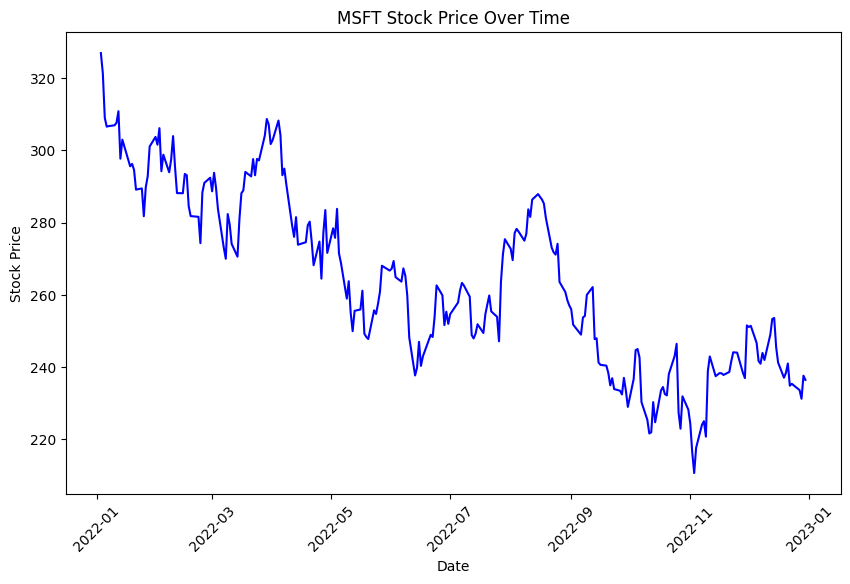

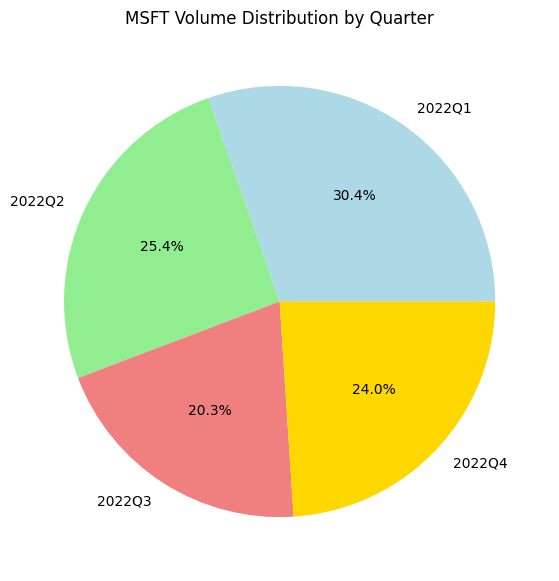

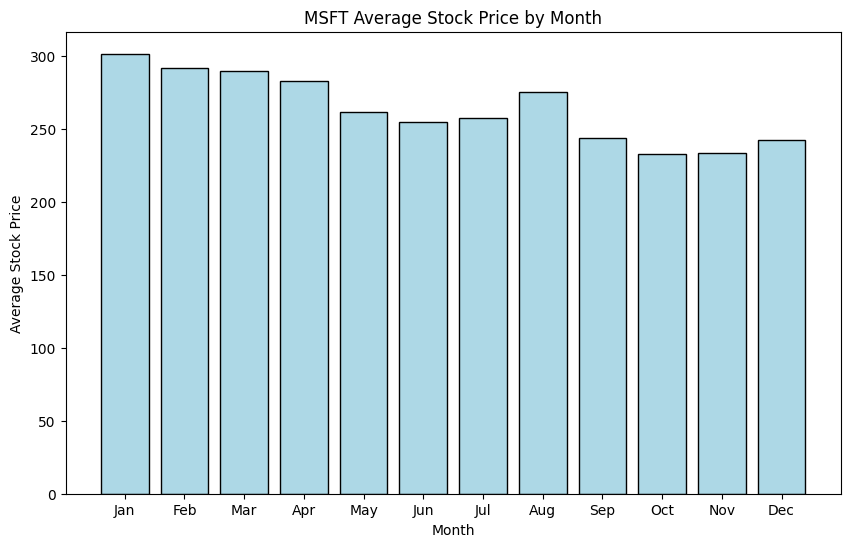

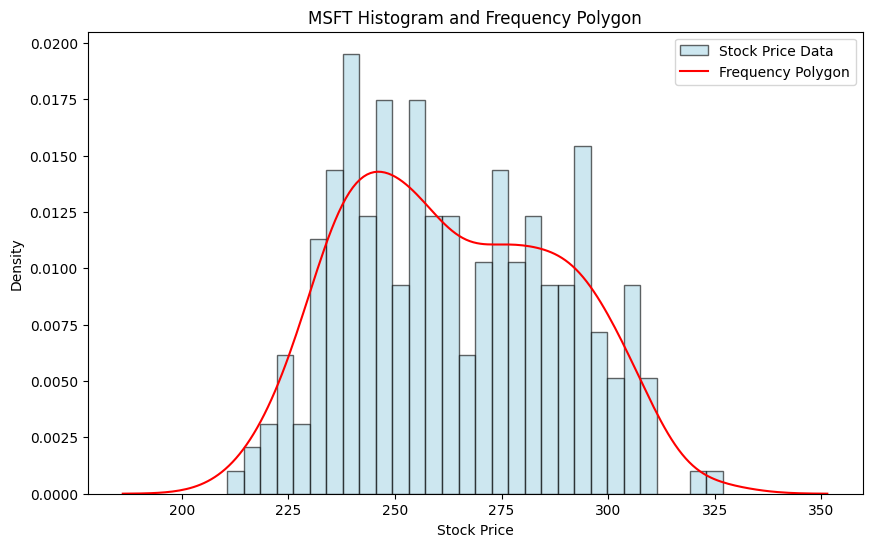

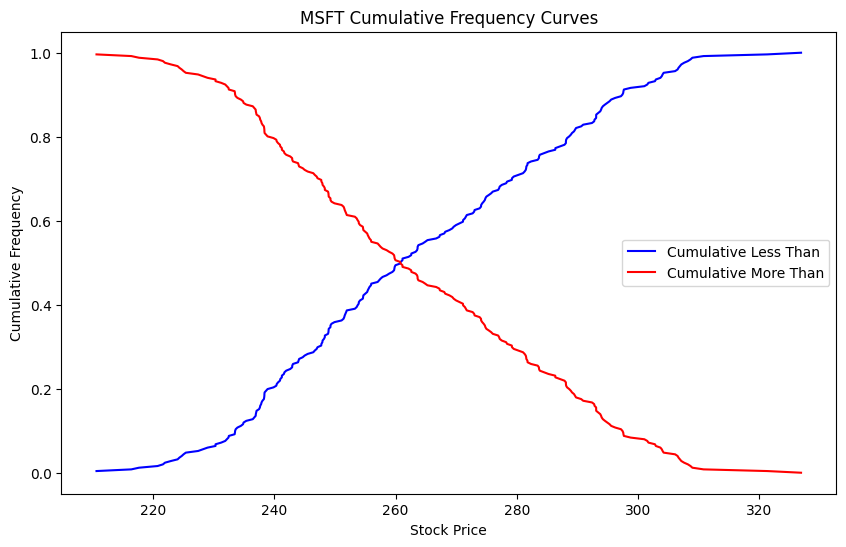

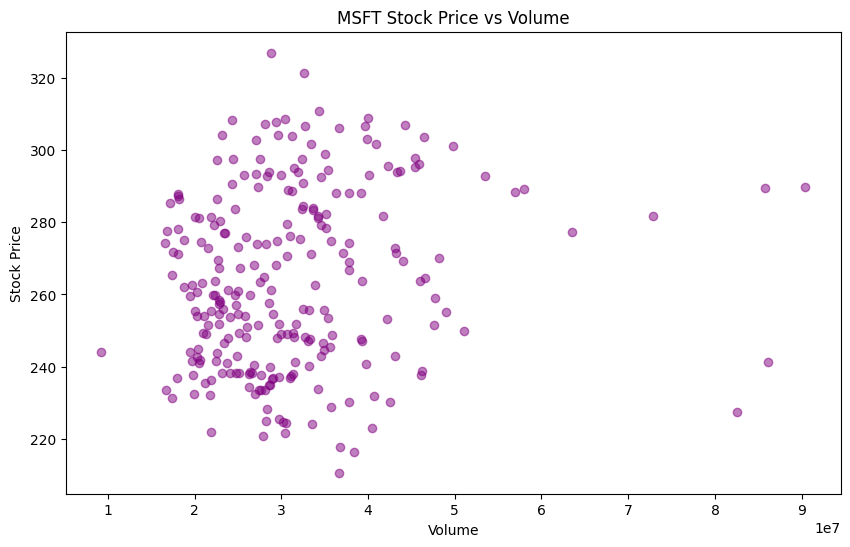

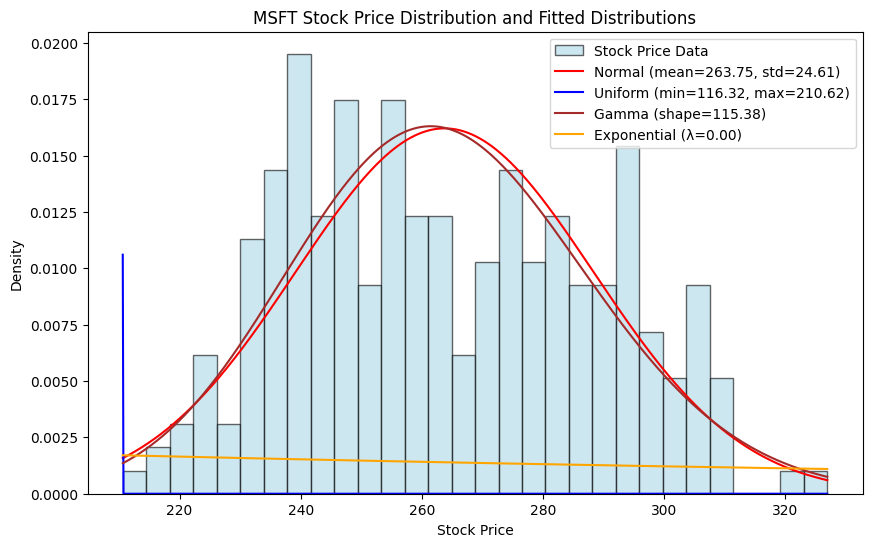


Empirical Moments:
Mean: 263.75, Variance: 608.05, Skewness: 0.19, Kurtosis: -0.92

Fitted Distributions Moments:
Normal - Mean: 263.75, Variance: 605.62
Uniform - Mean: 163.47, Variance: 741.00
Gamma - Mean: 263.75, Variance: 602.89
Exponential - Mean: 263.75, Variance: 69563.81


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, uniform,gamma, expon, skew, kurtosis

# Function to plot additional charts
def plot_additional_graphs(stock, stock_symbol):
    stock['Date'] = stock.index

    # Line Graph: Stock Price over time
    plt.figure(figsize=(10, 6))
    plt.plot(stock['Date'], stock['Stock Price'], color='blue')
    plt.title(f'{stock_symbol} Stock Price Over Time')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.xticks(rotation=45)
    plt.show()

    # Pie Chart: Visualizing the proportion of volume traded by quarters
    stock['Quarter'] = stock.index.to_period("Q")  # Create a 'Quarter' column based on the date index
    quarterly_volume = stock.groupby('Quarter')['Volume'].sum()  # Sum the volume for each quarter

    # Step 4: Plot pie chart for volume distribution by quarters
    plt.figure(figsize=(7, 7))
    quarterly_volume.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral', 'gold'],
                          legend=False, labels=quarterly_volume.index)
    plt.title(f'{stock_symbol} Volume Distribution by Quarter')
    plt.ylabel('')
    plt.show()
    # Bar Graph: Average Stock Price per Month
    stock['Month'] = stock.index.month
    avg_price_by_month = stock.groupby('Month')['Stock Price'].mean()

    plt.figure(figsize=(10, 6))
    plt.bar(avg_price_by_month.index, avg_price_by_month.values, color='lightblue', edgecolor='black')
    plt.title(f'{stock_symbol} Average Stock Price by Month')
    plt.xlabel('Month')
    plt.ylabel('Average Stock Price')
    plt.xticks(ticks=np.arange(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.show()

    # Frequency Polygon (overlay on histogram)
    plt.figure(figsize=(10, 6))
    plt.hist(stock['Stock Price'], bins=30, density=True, alpha=0.6, color='lightblue', edgecolor='black', label='Stock Price Data')
    sns.kdeplot(stock['Stock Price'], color='red', label='Frequency Polygon')
    plt.title(f'{stock_symbol} Histogram and Frequency Polygon')
    plt.xlabel('Stock Price')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

    # Cumulative Frequency (both less than and more than type)
    sorted_prices = np.sort(stock['Stock Price'])
    cumulative_freq_less_than = np.cumsum(np.ones_like(sorted_prices)) / len(sorted_prices)
    cumulative_freq_more_than = 1 - cumulative_freq_less_than

    plt.figure(figsize=(10, 6))
    plt.plot(sorted_prices, cumulative_freq_less_than, label='Cumulative Less Than', color='blue')
    plt.plot(sorted_prices, cumulative_freq_more_than, label='Cumulative More Than', color='red')
    plt.title(f'{stock_symbol} Cumulative Frequency Curves')
    plt.xlabel('Stock Price')
    plt.ylabel('Cumulative Frequency')
    plt.legend()
    plt.show()

    # Scatter Plot: Stock Price vs Volume
    plt.figure(figsize=(10, 6))
    plt.scatter(stock['Volume'], stock['Stock Price'], alpha=0.5, color='purple')
    plt.title(f'{stock_symbol} Stock Price vs Volume')
    plt.xlabel('Volume')
    plt.ylabel('Stock Price')
    plt.show()

# Function to download data and perform analysis
def analyze_stock(stock_symbol, start_date, end_date):
    print(f"Analyzing {stock_symbol} stock data...")

    # Step 1: Download historical data for the stock
    stock = yf.download(stock_symbol, start=start_date, end=end_date)

    # Use 'Adj Close' as 'Stock Price' for analysis
    stock['Stock Price'] = stock['Adj Close']

    # Calculate basic descriptive statistics
    mean_price = stock['Stock Price'].mean()
    variance_price = stock['Stock Price'].var()
    std_dev_price = stock['Stock Price'].std()
    skewness_price = skew(stock['Stock Price'])
    kurtosis_price = kurtosis(stock['Stock Price'])
    coefficient_of_variation = (std_dev_price / mean_price) * 100

    print(f"\nBasic Descriptive Statistics for {stock_symbol}:")
    print(f'Mean: {mean_price:.2f}, Variance: {variance_price:.2f}, Std Dev: {std_dev_price:.2f}')
    print(f'Skewness: {skewness_price:.2f}, Kurtosis: {kurtosis_price:.2f}')
    print(f'Coefficient of Variance: {coefficient_of_variation:.2f}')


    plot_additional_graphs(stock, stock_symbol)

    #  Fit distributions using method of moments

    # 1. Normal distribution (only uses mean and variance)
    mean_norm, std_dev_norm = norm.fit(stock['Stock Price'])
    # 2. Uniform distribution (mean and variance define it)
    max_uniform,min_uniform = uniform.fit(stock['Stock Price'])
    # 3. Gamma distribution (uses mean and variance)
    shape_gamma, loc_gamma, scale_gamma = gamma.fit(stock['Stock Price'], floc=0)
    # 4. Exponential distribution (mean equals 1/λ)
    lambda_exp = 1 / mean_price

    # Step 4: Plot the distributions alongside the stock price histogram
    # Generate x values for the fitted distributions
    x = np.linspace(stock['Stock Price'].min(), stock['Stock Price'].max(), 1000)
    # Plot stock price histogram
    plt.figure(figsize=(10, 6))
    plt.hist(stock['Stock Price'], bins=30, density=True, alpha=0.6, color='lightblue', edgecolor='black', label='Stock Price Data')
    # Plot fitted normal distribution
    plt.plot(x, norm.pdf(x, mean_norm, std_dev_norm), label=f'Normal (mean={mean_norm:.2f}, std={std_dev_norm:.2f})', color='red')
    # Plot fitted uniform distribution
    plt.plot(x, uniform.pdf(x, min_uniform, max_uniform - min_uniform), label=f'Uniform (min={min_uniform:.2f}, max={max_uniform:.2f})',color='blue')
    # Plot fitted gamma distribution
    plt.plot(x, gamma.pdf(x, shape_gamma, loc_gamma, scale_gamma), label=f'Gamma (shape={shape_gamma:.2f})', color='brown')
    # Plot fitted exponential distribution
    plt.plot(x, expon.pdf(x, scale=1/lambda_exp), label=f'Exponential (λ={lambda_exp:.2f})', color='orange')

    plt.title(f'{stock_symbol} Stock Price Distribution and Fitted Distributions')
    plt.xlabel('Stock Price')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

    # Step 5: Compare moments
    print("\nEmpirical Moments:")
    print(f"Mean: {mean_price:.2f}, Variance: {variance_price:.2f}, Skewness: {skewness_price:.2f}, Kurtosis: {kurtosis_price:.2f}")

    print("\nFitted Distributions Moments:")
    # Normal distribution moments
    print(f"Normal - Mean: {mean_norm:.2f}, Variance: {std_dev_norm**2:.2f}")
    # Uniform distribution moments
    mean_uniform = (min_uniform + max_uniform) / 2
    variance_uniform = (max_uniform - min_uniform)**2 / 12
    print(f"Uniform - Mean: {mean_uniform:.2f}, Variance: {variance_uniform:.2f}")
    # Gamma distribution moments
    mean_gamma = shape_gamma * scale_gamma
    variance_gamma = shape_gamma * scale_gamma**2
    print(f"Gamma - Mean: {mean_gamma:.2f}, Variance: {variance_gamma:.2f}")
    # Exponential distribution moments
    mean_exp = 1 / lambda_exp
    variance_exp = 1 / lambda_exp**2
    print(f"Exponential - Mean: {mean_exp:.2f}, Variance: {variance_exp:.2f}")

# Download and analyze multiple stocks
stocks = ['AAPL', 'MSFT']  # Add more stock symbols as needed
for stock_symbol in stocks:
    analyze_stock(stock_symbol, start_date='2022-01-01', end_date='2023-01-01')